In [ ]:
## PHONE AIR - price predictor

In [2]:
import pandas as pd
import numpy as np


In [3]:
phone = pd.read_csv("data.csv")

In [4]:
phone.head()

,brand,os,inches,resolution,battery,battery_type,battet_t_code,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,0,2,9/1/2016,140,...,False,False,False,True,False,False,False,False,False,120.0
1,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,1,2,12/1/2016,140,...,True,False,False,True,False,False,False,False,False,100.0
2,Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,1,4,1/1/2017,147,...,True,False,False,True,False,False,False,False,False,420.0
3,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,0,4,1/1/2017,165,...,True,False,False,True,False,True,False,False,False,150.0
4,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,1,4,2/1/2017,145,...,True,True,False,True,True,False,False,False,False,420.0


In [5]:
phone.describe(include='all')

,brand,os,inches,resolution,battery,battery_type,battet_t_code,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
count,1512,1512,1512.000000,1512,1512.000000,1512,1512.000000,1512.000000,1512,1512.000000,...,1512,1512,1512,1512,1512,1512,1512,1512,1512,1512.000000
unique,13,34,NaN,85,NaN,2,NaN,NaN,665,NaN,...,2,2,2,2,2,2,2,2,2,NaN
top,Xiaomi,Android 11,NaN,1080x2400,NaN,Li-Po,NaN,NaN,5/1/2018,NaN,...,True,True,False,True,False,False,False,False,False,NaN
freq,264,322,NaN,437,NaN,1242,NaN,NaN,20,NaN,...,1503,801,1426,1348,946,1102,1310,1477,1290,NaN
mean,NaN,NaN,6.422460,NaN,4389.798942,NaN,0.178571,6.683862,NaN,187.636243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,337.847036
std,NaN,NaN,0.477043,NaN,784.607022,NaN,0.383120,2.701433,NaN,26.200115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.740821
min,NaN,NaN,3.800000,NaN,1821.000000,NaN,0.000000,1.000000,NaN,130.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000
25%,NaN,NaN,6.300000,NaN,4000.000000,NaN,0.000000,4.000000,NaN,175.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.997500
50%,NaN,NaN,6.500000,NaN,4500.000000,NaN,0.000000,8.000000,NaN,187.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.000000
75%,NaN,NaN,6.670000,NaN,5000.000000,NaN,0.000000,8.000000,NaN,197.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.000000


In [6]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1512 non-null   object 
 1   os                 1512 non-null   object 
 2   inches             1512 non-null   float64
 3   resolution         1512 non-null   object 
 4   battery            1512 non-null   int64  
 5   battery_type       1512 non-null   object 
 6   battet_t_code      1512 non-null   int64  
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   int64  
 10  storage(GB)        1512 non-null   int64  
 11  N_video_720p       1512 non-null   int64  
 12  N_video_1080p      1512 non-null   int64  
 13  N_video_4K         1512 non-null   int64  
 14  N_video_8K         1512 non-null   int64  
 15  N_video_30fps      1512 non-null   int64  
 16  N_video_60fps      1512 

In [7]:
phone['ram(GB)'].value_counts()

ram(GB)
8     736
6     277
4     261
3      98
2      50
12     42
16     30
1      11
24      3
18      2
5       1
10      1
Name: count, dtype: int64

In [8]:
phone['storage(GB)'].value_counts()

storage(GB)
128    677
64     382
32     211
256    154
16      66
512     13
8        8
1        1
Name: count, dtype: int64

In [9]:
phone['brand'].value_counts()

brand
Xiaomi     264
Oppo       213
Samsung    206
Vivo       168
Realme     157
Huawei     137
Honor      124
LG          75
OnePlus     47
Lenovo      43
Sony        37
Apple       22
Google      19
Name: count, dtype: int64

In [10]:
phone['os'].value_counts()

os
Android 11                322
Android 10                317
Android 12                233
Android 9.0               210
Android 13                154
Android 8.1                83
Android 8.0                55
Android 7.0                33
Android 7.1.1              17
Android 7.1                14
Android 7.1.2              13
EMUI 12                     6
Android 6.0                 6
Android 8.1 Oreo            5
iOS 16                      4
iOS 15                      4
iOS 14.1                    4
iOS 13                      4
iOS 12                      3
Android 6                   3
Android                     3
Android 12 or 13            2
Android 5.1                 2
Android 9.0 Pie             2
Android 8.0 Oreo            2
Android 6.0.1               2
EMUI 13                     2
Android 10/ Android 11      1
iOS 15.4                    1
iOS 11.1.1                  1
iOS 11                      1
Android 12L                 1
Tizen 3.0                   1
Android

In [11]:
phone['battery_type'].value_counts()

battery_type
Li-Po     1242
Li-Ion     270
Name: count, dtype: int64

In [12]:
phone.describe()

,inches,battery,battet_t_code,ram(GB),weight(g),storage(GB),N_video_720p,N_video_1080p,N_video_4K,N_video_8K,N_video_30fps,N_video_60fps,N_video_120fps,N_video_240fps,N_video_480fps,N_video_960fps,price(USD)
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,0.178571,6.683862,187.636243,109.164683,0.539683,0.994048,0.529762,0.056878,0.891534,0.374339,0.271164,0.133598,0.023148,0.146825,337.847036
std,0.477043,784.607022,0.383120,2.701433,26.200115,74.436484,0.498588,0.076947,0.499279,0.231687,0.311070,0.484112,0.444708,0.340332,0.150424,0.354049,266.740821
min,3.800000,1821.000000,0.000000,1.000000,130.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,6.300000,4000.000000,0.000000,4.000000,175.000000,64.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.997500
50%,6.500000,4500.000000,0.000000,8.000000,187.000000,128.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,260.000000
75%,6.670000,5000.000000,0.000000,8.000000,197.250000,128.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,400.000000
max,10.400000,7250.000000,1.000000,24.000000,500.000000,512.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2300.000000


In [13]:
%matplotlib inline

In [14]:
import matplotlib.pyplot as plt


array([[<Axes: title={'center': 'inches'}>,
        <Axes: title={'center': 'battery'}>,
        <Axes: title={'center': 'battet_t_code'}>,
        <Axes: title={'center': 'ram(GB)'}>],
       [<Axes: title={'center': 'weight(g)'}>,
        <Axes: title={'center': 'storage(GB)'}>,
        <Axes: title={'center': 'N_video_720p'}>,
        <Axes: title={'center': 'N_video_1080p'}>],
       [<Axes: title={'center': 'N_video_4K'}>,
        <Axes: title={'center': 'N_video_8K'}>,
        <Axes: title={'center': 'N_video_30fps'}>,
        <Axes: title={'center': 'N_video_60fps'}>],
       [<Axes: title={'center': 'N_video_120fps'}>,
        <Axes: title={'center': 'N_video_240fps'}>,
        <Axes: title={'center': 'N_video_480fps'}>,
        <Axes: title={'center': 'N_video_960fps'}>],
       [<Axes: title={'center': 'price(USD)'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

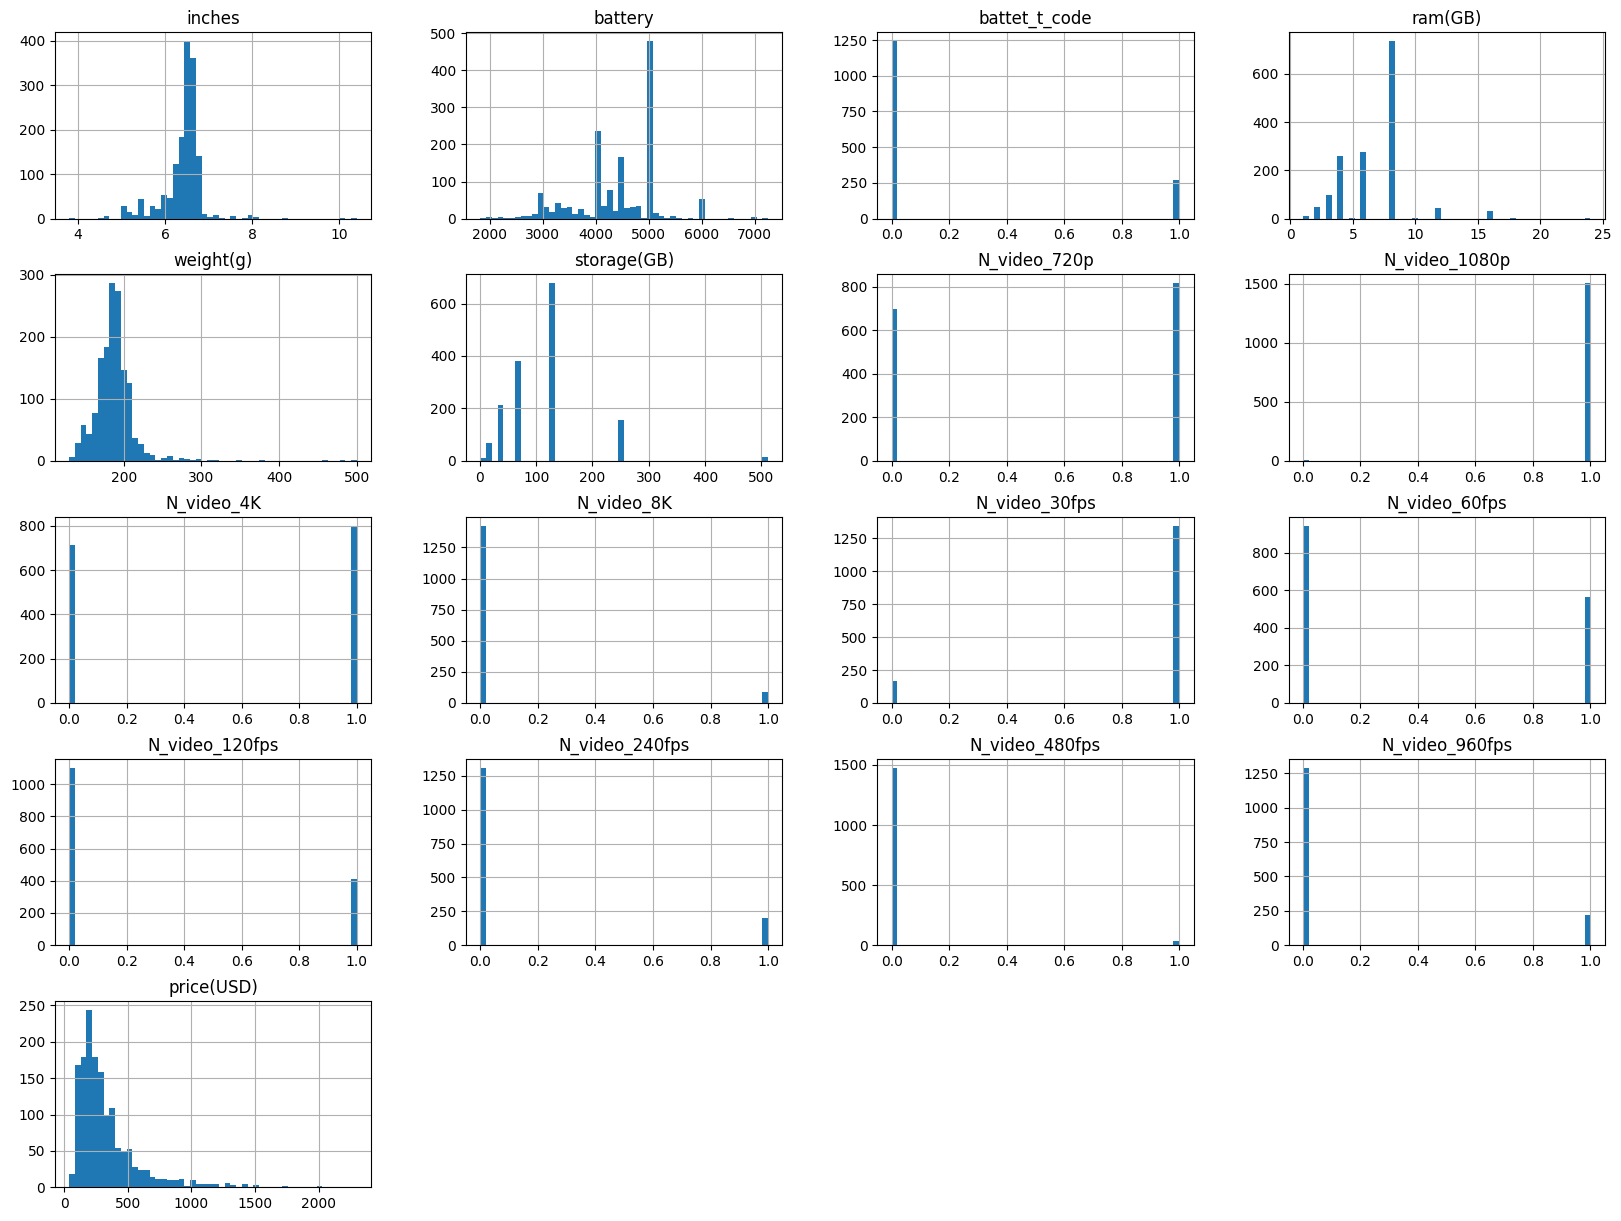

In [15]:
phone.hist(bins=50, figsize=(20,15))

## looking for correlations

In [16]:
numeric_columns = phone.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numeric features with 'price'
correlation_matrix = numeric_columns.corr()
correlation_with_price = correlation_matrix['price(USD)']#.drop('price(USD)')  # Exclude 'price' itself

# Sort the features by their correlation with 'price' (descending order)
sorted_correlation = correlation_with_price.sort_values(ascending=False)

# Print the sorted correlation values
print("Correlation with 'price(USD)':")
print(sorted_correlation)

Correlation with 'price(USD)':
price(USD)        1.000000
storage(GB)       0.354250
N_video_4K        0.312411
N_video_720p      0.310810
ram(GB)           0.293638
N_video_60fps     0.279261
N_video_240fps    0.251236
N_video_8K        0.218943
weight(g)         0.214427
inches            0.192769
N_video_120fps    0.176557
N_video_960fps    0.169626
N_video_480fps    0.059608
battet_t_code     0.017160
N_video_1080p    -0.004462
battery          -0.008050
N_video_30fps    -0.186677
Name: price(USD), dtype: float64


array([[<Axes: xlabel='price(USD)', ylabel='price(USD)'>,
        <Axes: xlabel='storage(GB)', ylabel='price(USD)'>,
        <Axes: xlabel='N_video_4K', ylabel='price(USD)'>,
        <Axes: xlabel='N_video_720p', ylabel='price(USD)'>,
        <Axes: xlabel='ram(GB)', ylabel='price(USD)'>],
       [<Axes: xlabel='price(USD)', ylabel='storage(GB)'>,
        <Axes: xlabel='storage(GB)', ylabel='storage(GB)'>,
        <Axes: xlabel='N_video_4K', ylabel='storage(GB)'>,
        <Axes: xlabel='N_video_720p', ylabel='storage(GB)'>,
        <Axes: xlabel='ram(GB)', ylabel='storage(GB)'>],
       [<Axes: xlabel='price(USD)', ylabel='N_video_4K'>,
        <Axes: xlabel='storage(GB)', ylabel='N_video_4K'>,
        <Axes: xlabel='N_video_4K', ylabel='N_video_4K'>,
        <Axes: xlabel='N_video_720p', ylabel='N_video_4K'>,
        <Axes: xlabel='ram(GB)', ylabel='N_video_4K'>],
       [<Axes: xlabel='price(USD)', ylabel='N_video_720p'>,
        <Axes: xlabel='storage(GB)', ylabel='N_video_720p'>,
 

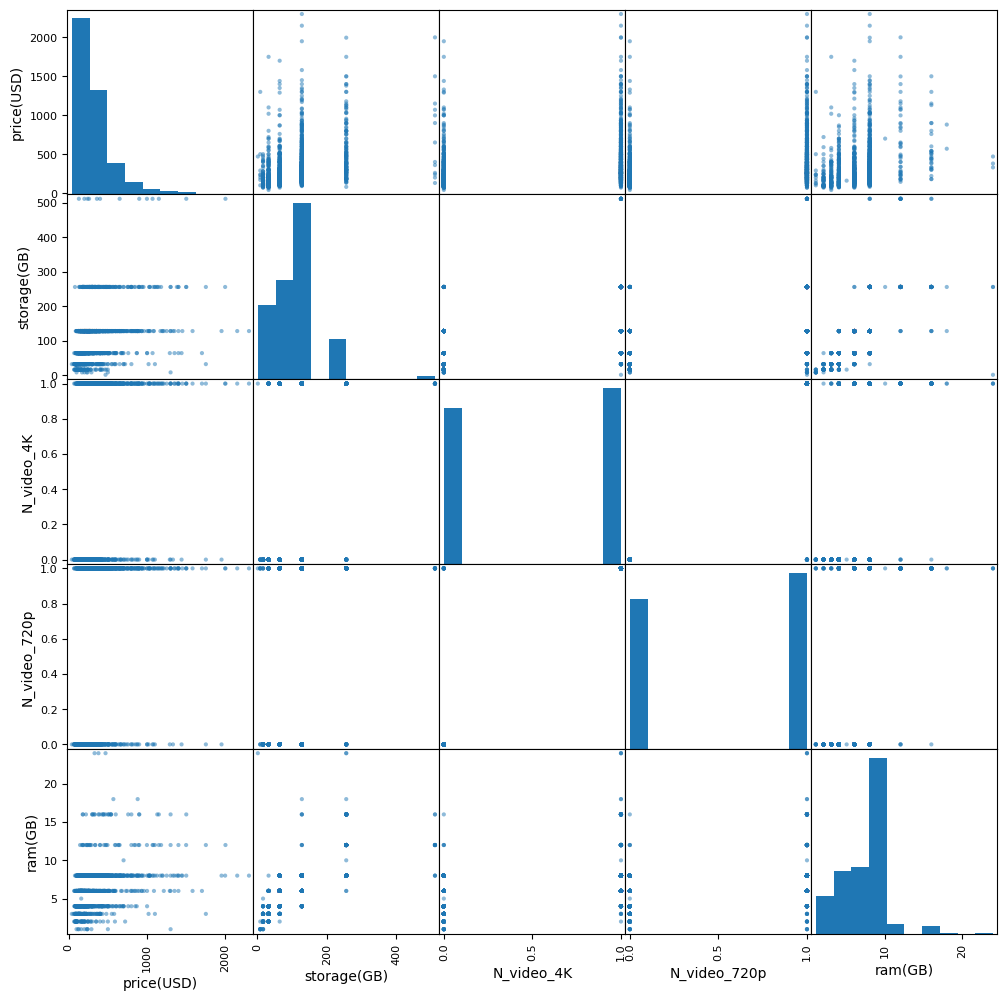

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["price(USD)","storage(GB)","N_video_4K","N_video_720p","ram(GB)"]
scatter_matrix(phone[attributes],figsize=(12,12))

<Axes: xlabel='storage(GB)', ylabel='price(USD)'>

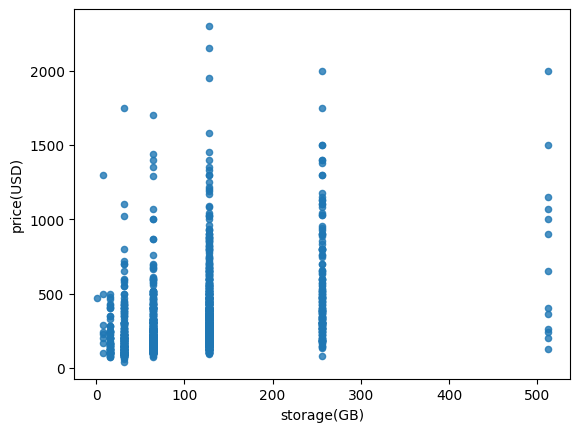

In [18]:
phone.plot(kind="scatter", y="price(USD)", x="storage(GB)", alpha=0.8)

## trying out attribute combination

In [19]:
# phone["storage(GB)_rate"]=phone["price(USD)"]/phone["storage(GB)"]

In [20]:
# phone["quality_+ram_rate"]=phone["price(USD)"] /( phone["N_video_4K"] + phone["N_video_720p"]+phone["ram(GB)"])	

In [21]:
phone["ram(GB)_rate"]=phone["price(USD)"]/phone["ram(GB)"]

In [22]:
phone["storage_ram"]=phone["storage(GB)"]/(phone["ram(GB)"]*10)

In [23]:
phone["storage_ram2"]=phone["storage(GB)"]*phone["ram(GB)"]

In [24]:
phone["battery_storage"]=phone["battery"]/phone["storage(GB)"]

In [25]:
phone.head()


,brand,os,inches,resolution,battery,battery_type,battet_t_code,ram(GB),announcement_date,weight(g),...,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD),ram(GB)_rate,storage_ram,storage_ram2,battery_storage
0,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,0,2,9/1/2016,140,...,False,False,False,False,False,120.0,60.0,0.8,32,137.500
1,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,1,2,12/1/2016,140,...,False,False,False,False,False,100.0,50.0,0.8,32,168.750
2,Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,1,4,1/1/2017,147,...,False,False,False,False,False,420.0,105.0,0.4,64,187.500
3,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,0,4,1/1/2017,165,...,False,True,False,False,False,150.0,37.5,0.8,128,128.125
4,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,1,4,2/1/2017,145,...,True,False,False,False,False,420.0,105.0,0.8,128,100.000


In [26]:
numeric_columns = phone.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numeric features with 'price'
correlation_matrix = numeric_columns.corr()
correlation_with_price = correlation_matrix['price(USD)']#.drop('price(USD)')  # Exclude 'price' itself

# Sort the features by their correlation with 'price' (descending order)
sorted_correlation = correlation_with_price.sort_values(ascending=False)

# Print the sorted correlation values
print("Correlation with 'price(USD)':")
print(sorted_correlation)

Correlation with 'price(USD)':
price(USD)         1.000000
ram(GB)_rate       0.632077
storage(GB)        0.354250
storage_ram2       0.350779
N_video_4K         0.312411
N_video_720p       0.310810
ram(GB)            0.293638
N_video_60fps      0.279261
N_video_240fps     0.251236
storage_ram        0.250249
N_video_8K         0.218943
weight(g)          0.214427
inches             0.192769
N_video_120fps     0.176557
N_video_960fps     0.169626
N_video_480fps     0.059608
battet_t_code      0.017160
N_video_1080p     -0.004462
battery           -0.008050
battery_storage   -0.096588
N_video_30fps     -0.186677
Name: price(USD), dtype: float64


<Axes: xlabel='ram(GB)_rate', ylabel='price(USD)'>

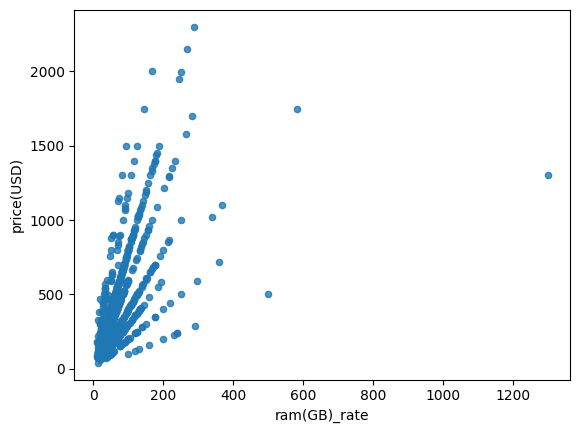

In [27]:
phone.plot(kind="scatter", y="price(USD)", x="ram(GB)_rate", alpha=0.8)

<Axes: xlabel='brand', ylabel='price(USD)'>

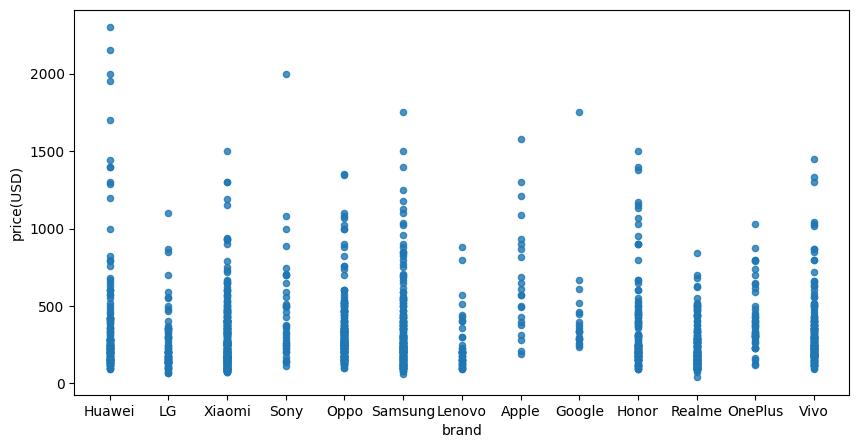

In [28]:
phone.plot(kind="scatter", y="price(USD)", x="brand", alpha=0.8 , figsize=(10, 5))

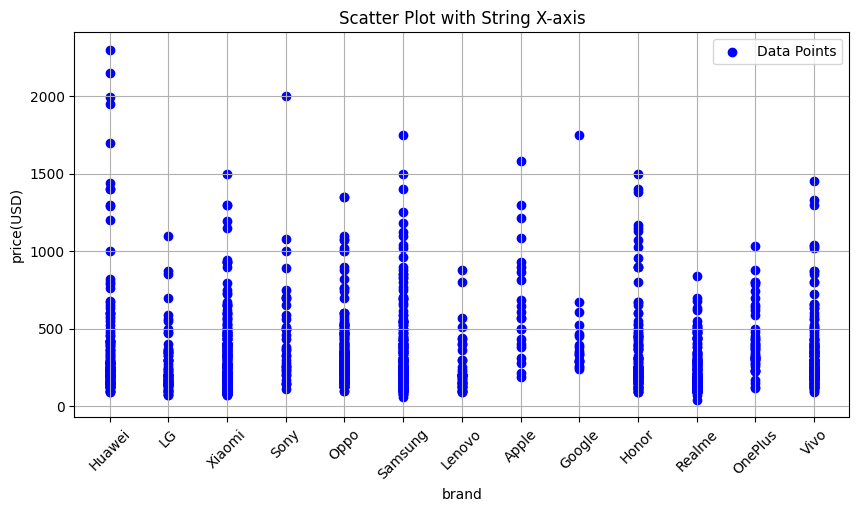

In [29]:
import matplotlib.pyplot as plt
x_column = 'brand'  # Replace with the actual column name in your dataset
y_column = 'price(USD)' 
# Create a scatter plot
plt.figure(figsize=(10, 5))  # Optional: Adjust the figure size
plt.scatter(phone[x_column], phone[y_column], marker='o', color='blue', label='Data Points')

# Add labels and a title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Scatter Plot with String X-axis')

# Rotate the x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

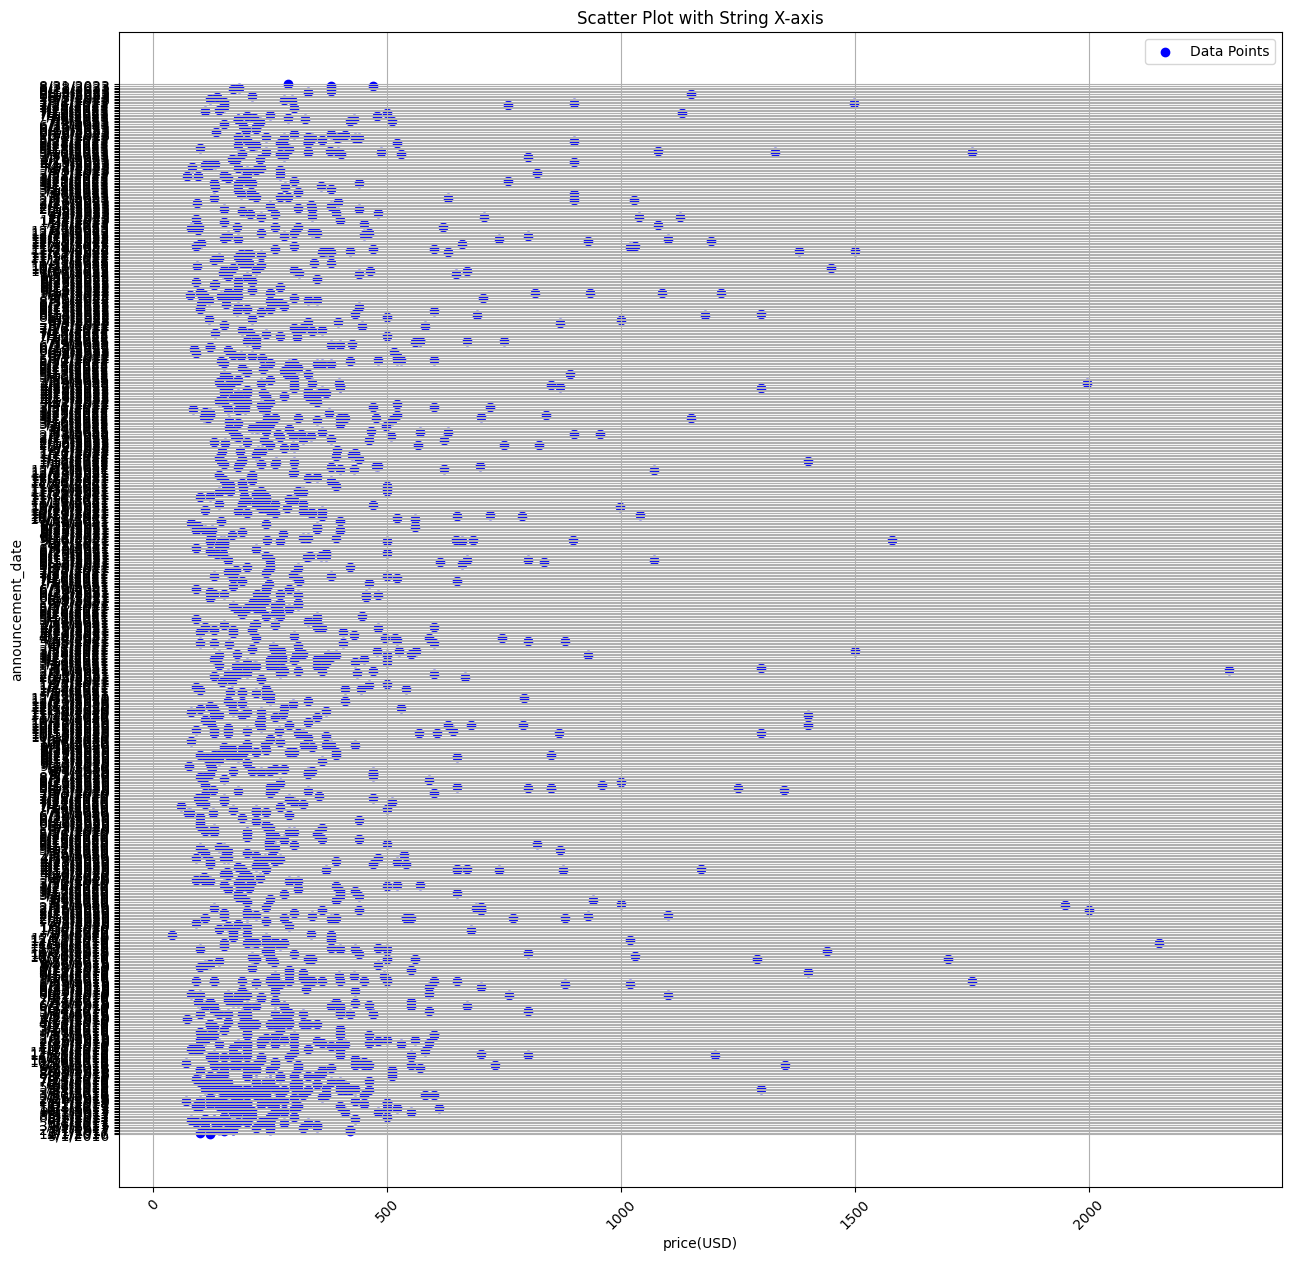

In [30]:
import matplotlib.pyplot as plt
x_column = 'price(USD)'  # Replace with the actual column name in your dataset
y_column = 'announcement_date' 
# Create a scatter plot
plt.figure(figsize=(15, 15))  # Optional: Adjust the figure size
plt.scatter(phone[x_column], phone[y_column], marker='o', color='blue', label='Data Points')

# Add labels and a title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Scatter Plot with String X-axis')

# Rotate the x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the plot
plt.legend()
plt.grid(True)
plt.show()


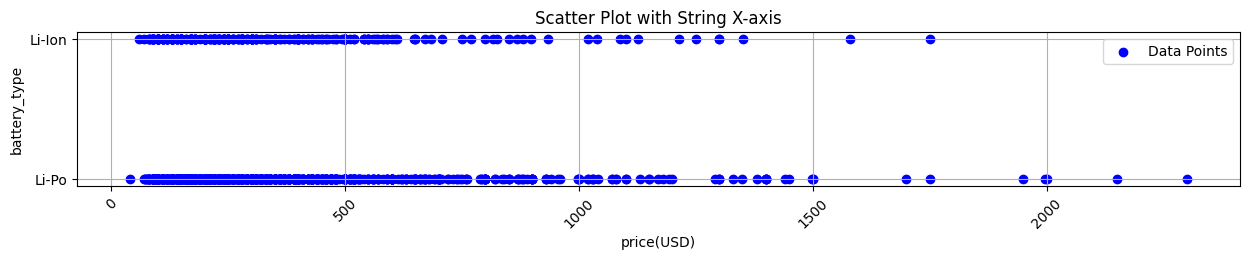

In [31]:
import matplotlib.pyplot as plt
x_column = 'price(USD)'  # Replace with the actual column name in your dataset
y_column = 'battery_type' 
# Create a scatter plot
plt.figure(figsize=(15, 2))  # Optional: Adjust the figure size
plt.scatter(phone[x_column], phone[y_column], marker='o', color='blue', label='Data Points')

# Add labels and a title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Scatter Plot with String X-axis')

# Rotate the x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the plot
plt.legend()
plt.grid(True)
plt.show()


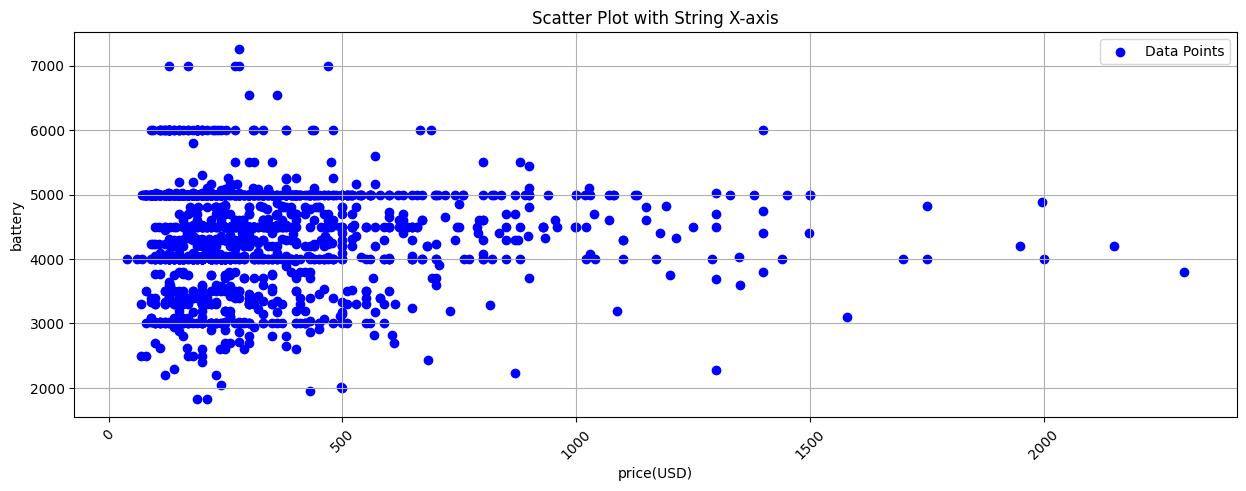

In [32]:
import matplotlib.pyplot as plt
x_column = 'price(USD)'  # Replace with the actual column name in your dataset
y_column = 'battery' 
# Create a scatter plot
plt.figure(figsize=(15, 5))  # Optional: Adjust the figure size
plt.scatter(phone[x_column], phone[y_column], marker='o', color='blue', label='Data Points')

# Add labels and a title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Scatter Plot with String X-axis')

# Rotate the x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the plot
plt.legend()
plt.grid(True)
plt.show()


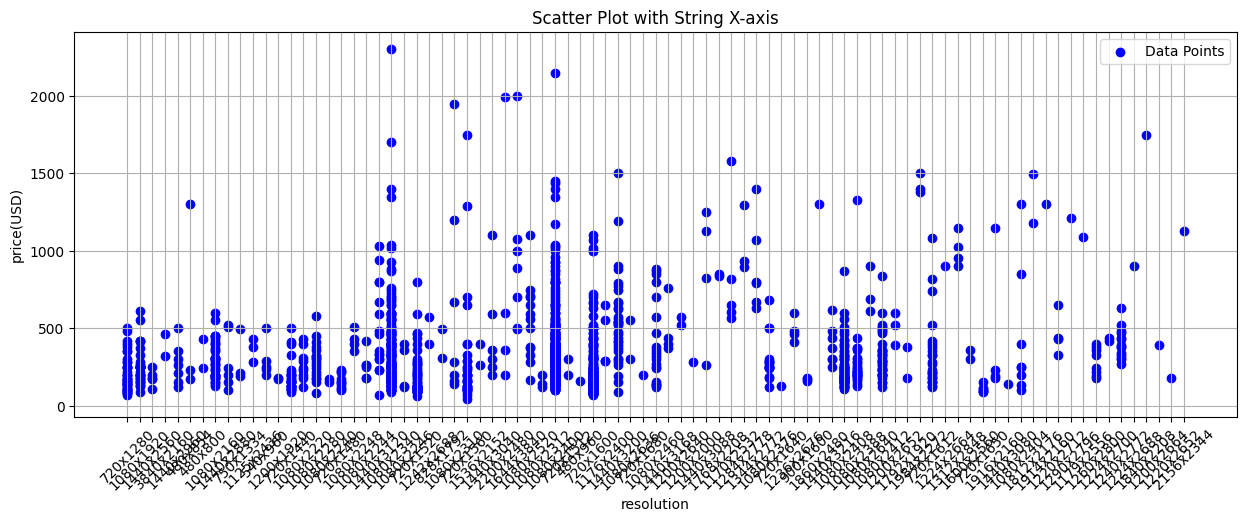

In [33]:
import matplotlib.pyplot as plt
y_column = 'price(USD)'  # Replace with the actual column name in your dataset
x_column = 'resolution' 
# Create a scatter plot
plt.figure(figsize=(15, 5))  # Optional: Adjust the figure size
plt.scatter(phone[x_column], phone[y_column], marker='o', color='blue', label='Data Points')

# Add labels and a title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Scatter Plot with String X-axis')

# Rotate the x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

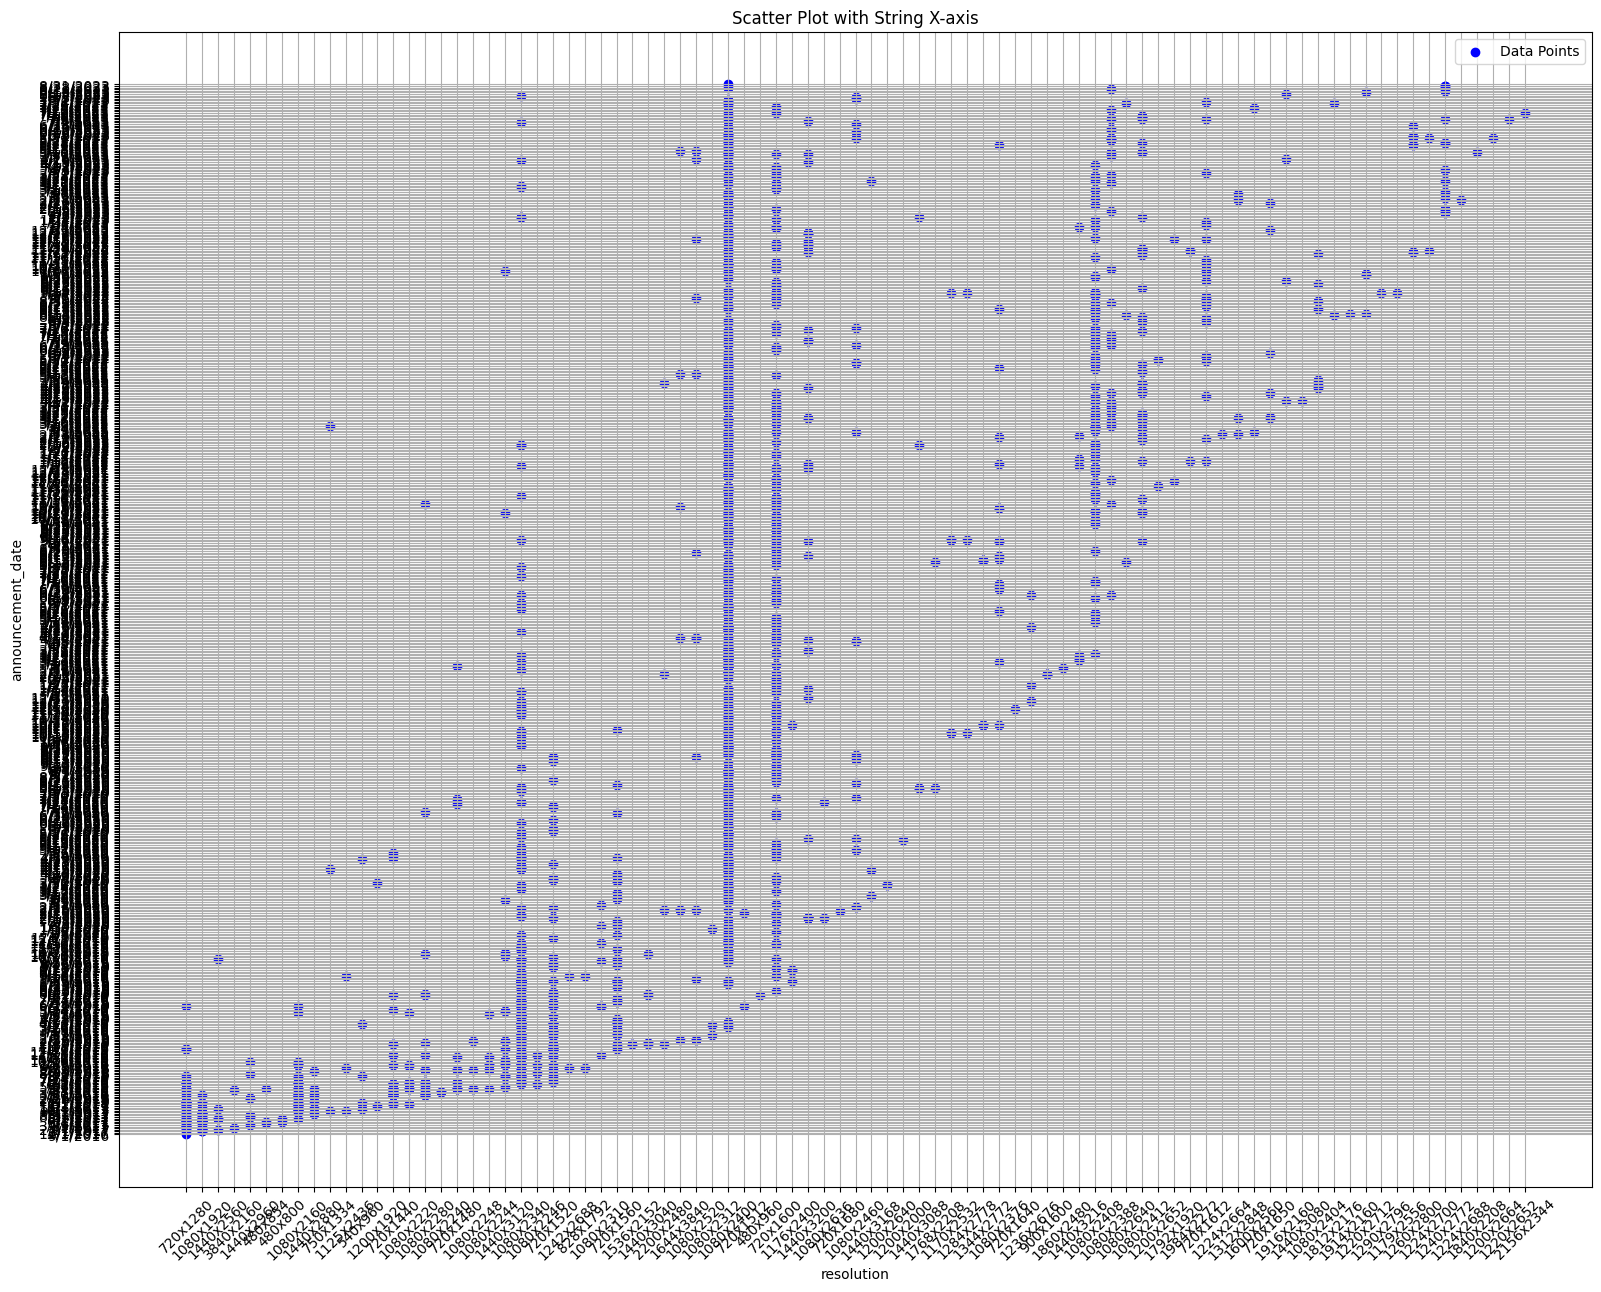

In [34]:
import matplotlib.pyplot as plt
x_column = 'resolution'  # Replace with the actual column name in your dataset
y_column = 'announcement_date' 
# Create a scatter plot
plt.figure(figsize=(19, 15))  # Optional: Adjust the figure size
plt.scatter(phone[x_column], phone[y_column], marker='o', color='blue', label='Data Points')

# Add labels and a title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Scatter Plot with String X-axis')

# Rotate the x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

# Prework before train test spliting

In [35]:
phone_orignal =phone.drop(["battery_type","announcement_date","video_720p","video_1080p","battery_storage", "video_4K","video_8K","video_30fps","video_60fps", "video_120fps","video_240fps", "video_480fps","video_960fps"],axis=1)


In [36]:
phone.head(1)

,brand,os,inches,resolution,battery,battery_type,battet_t_code,ram(GB),announcement_date,weight(g),...,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD),ram(GB)_rate,storage_ram,storage_ram2,battery_storage
0,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,0,2,9/1/2016,140,...,False,False,False,False,False,120.0,60.0,0.8,32,137.5


In [37]:
phone_orignal.head(1)

,brand,os,inches,resolution,battery,battet_t_code,ram(GB),weight(g),storage(GB),N_video_720p,...,N_video_30fps,N_video_60fps,N_video_120fps,N_video_240fps,N_video_480fps,N_video_960fps,price(USD),ram(GB)_rate,storage_ram,storage_ram2
0,Huawei,Android 5.1,5.0,720x1280,2200,0,2,140,16,1,...,1,0,0,0,0,0,120.0,60.0,0.8,32


In [38]:
phone_orignal.shape

(1512, 23)

In [39]:
phone_orignal.info

<bound method DataFrame.info of        brand           os  inches resolution  battery  battet_t_code  ram(GB)  \
0     Huawei  Android 5.1    5.00   720x1280     2200              0        2   
1         LG  Android 7.0    5.30   720x1280     2700              1        2   
2     Huawei  Android 7.0    5.20  1080x1920     3000              1        4   
3     Xiaomi  Android 6.0    5.50  1080x1920     4100              0        4   
4     Huawei  Android 7.0    5.10  1080x1920     3200              1        4   
...      ...          ...     ...        ...      ...            ...      ...   
1507    Vivo   Android 13    6.64  1080x2388     5000              0        8   
1508  Realme   Android 13    6.72  1080x2400     5000              0        8   
1509  Realme   Android 13    6.74  1240x2772     5240              0       16   
1510  Realme   Android 13    6.74  1240x2772     4600              0       24   
1511    Vivo   Android 13    6.78  1080x2400     4600              0        8

In [40]:
phone_orignal.describe()

,inches,battery,battet_t_code,ram(GB),weight(g),storage(GB),N_video_720p,N_video_1080p,N_video_4K,N_video_8K,N_video_30fps,N_video_60fps,N_video_120fps,N_video_240fps,N_video_480fps,N_video_960fps,price(USD),ram(GB)_rate,storage_ram,storage_ram2
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,0.178571,6.683862,187.636243,109.164683,0.539683,0.994048,0.529762,0.056878,0.891534,0.374339,0.271164,0.133598,0.023148,0.146825,337.847036,56.142061,1.557728,870.116402
std,0.477043,784.607022,0.383120,2.701433,26.200115,74.436484,0.498588,0.076947,0.499279,0.231687,0.311070,0.484112,0.444708,0.340332,0.150424,0.354049,266.740821,56.347558,0.717182,915.799028
min,3.800000,1821.000000,0.000000,1.000000,130.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,10.000000,0.004167,8.000000
25%,6.300000,4000.000000,0.000000,4.000000,175.000000,64.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.997500,28.593375,1.066667,256.000000
50%,6.500000,4500.000000,0.000000,8.000000,187.000000,128.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,260.000000,41.277500,1.600000,768.000000
75%,6.670000,5000.000000,0.000000,8.000000,197.250000,128.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,400.000000,64.995313,1.600000,1024.000000
max,10.400000,7250.000000,1.000000,24.000000,500.000000,512.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2300.000000,1300.000000,6.400000,8192.000000


## TRAIN -TEST SPLITING

In [41]:
X=phone_orignal.drop(columns=['price(USD)'])
Y=phone_orignal['price(USD)']

In [42]:
X

,brand,os,inches,resolution,battery,battet_t_code,ram(GB),weight(g),storage(GB),N_video_720p,...,N_video_8K,N_video_30fps,N_video_60fps,N_video_120fps,N_video_240fps,N_video_480fps,N_video_960fps,ram(GB)_rate,storage_ram,storage_ram2
0,Huawei,Android 5.1,5.00,720x1280,2200,0,2,140,16,1,...,0,1,0,0,0,0,0,60.000000,0.800000,32
1,LG,Android 7.0,5.30,720x1280,2700,1,2,140,16,0,...,0,1,0,0,0,0,0,50.000000,0.800000,32
2,Huawei,Android 7.0,5.20,1080x1920,3000,1,4,147,16,0,...,0,1,0,0,0,0,0,105.000000,0.400000,64
3,Xiaomi,Android 6.0,5.50,1080x1920,4100,0,4,165,32,1,...,0,1,0,1,0,0,0,37.500000,0.800000,128
4,Huawei,Android 7.0,5.10,1080x1920,3200,1,4,145,32,1,...,0,1,1,0,0,0,0,105.000000,0.800000,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Vivo,Android 13,6.64,1080x2388,5000,0,8,190,256,0,...,0,1,0,0,0,0,0,21.250000,3.200000,2048
1508,Realme,Android 13,6.72,1080x2400,5000,0,8,190,128,0,...,0,1,0,0,0,0,0,22.860000,1.600000,1024
1509,Realme,Android 13,6.74,1240x2772,5240,0,16,205,256,1,...,0,0,1,0,0,0,0,23.750000,1.600000,4096
1510,Realme,Android 13,6.74,1240x2772,4600,0,24,205,1,1,...,0,0,1,0,0,0,0,19.583333,0.004167,24


In [43]:
Y

0       120.000
1       100.000
2       420.000
3       150.000
4       420.000
         ...   
1507    170.000
1508    182.880
1509    380.000
1510    470.000
1511    287.988
Name: price(USD), Length: 1512, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [45]:
X_train.shape

(1209, 22)

In [46]:
X_train

,brand,os,inches,resolution,battery,battet_t_code,ram(GB),weight(g),storage(GB),N_video_720p,...,N_video_8K,N_video_30fps,N_video_60fps,N_video_120fps,N_video_240fps,N_video_480fps,N_video_960fps,ram(GB)_rate,storage_ram,storage_ram2
452,Realme,Android 9.0,6.10,720x1560,4000,0,3,166,32,0,...,0,1,0,0,0,0,0,13.333333,1.066667,96
47,Huawei,Android 7.0,5.00,720x1280,3020,1,2,145,16,0,...,0,1,0,0,0,0,0,125.000000,0.800000,32
892,Vivo,Android 11,6.44,1080x2400,4000,0,8,165,128,1,...,0,1,0,0,0,0,0,30.000000,1.600000,1024
801,Xiaomi,Android 11,6.67,1080x2400,4520,0,8,196,128,1,...,0,1,1,0,0,0,1,47.500000,1.600000,1024
220,LG,Android 8.1,6.40,1440x3120,3300,0,6,169,64,1,...,0,1,1,1,1,0,0,11.666667,1.066667,384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,Realme,Android 11,6.50,720x1600,5000,0,6,186,128,1,...,0,0,1,0,0,0,0,26.666667,2.133333,768
835,Oppo,Android 11,6.50,1080x2400,5000,0,4,190,64,0,...,0,1,0,0,0,0,0,129.320000,1.600000,256
1216,Vivo,Android 12,6.58,1080x2408,5000,0,8,194,128,0,...,0,1,0,0,0,0,0,25.000000,1.600000,1024
559,Oppo,Android 10,6.50,1080x2400,5000,0,8,192,128,1,...,0,1,0,1,0,0,0,66.875000,1.600000,1024


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error


In [49]:
# Define transformers for numeric and categorical features
numeric_features = [2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = [0,1,3]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with the ColumnTransformer and multiple regressors
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(max_depth=8)),
    ('Random Forest', RandomForestRegressor(n_estimators=100,
                              random_state=2,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)),
    ('Ridge',Ridge(alpha=10)),
    ('Lasso',Lasso(alpha=0.001)),
    (' KNeighborsRegressor', KNeighborsRegressor(n_neighbors=3)),
    ('SVR',SVR(kernel='rbf',C=10000,epsilon=0.1)),
    ('GradientBoostingRegressor',GradientBoostingRegressor(n_estimators=500))
]

# Create a dictionary to store the results
results = {}

for model_name, regressor in models:
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])

    # Fit the model
    model.fit(X_train, Y_train)

    # Make predictions
    Y_pred = model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)

    results[model_name] = {'R2 score': r2, 'Mean Absolute Error': mae}

# Print the results
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")


Linear Regression: {'R2 score': -1.1325174569122893, 'Mean Absolute Error': 93.69689420359924}
Decision Tree: {'R2 score': 0.9374194710932953, 'Mean Absolute Error': 18.130681395260513}
Random Forest: {'R2 score': 0.9390542904804197, 'Mean Absolute Error': 18.282129852853828}
Ridge: {'R2 score': 0.7336748220287366, 'Mean Absolute Error': 77.06747815564864}
Lasso: {'R2 score': -1.126157636174876, 'Mean Absolute Error': 93.27789082627929}
 KNeighborsRegressor: {'R2 score': 0.5350181943270435, 'Mean Absolute Error': 102.43695269526951}
SVR: {'R2 score': 0.9310474473599705, 'Mean Absolute Error': 19.701130470055215}
GradientBoostingRegressor: {'R2 score': 0.9681021044060533, 'Mean Absolute Error': 12.198718711769514}


## Exporting the Mode

In [50]:
import pickle

pickle.dump(phone_orignal,open('phone_orignal.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))


In [51]:
X_train

,brand,os,inches,resolution,battery,battet_t_code,ram(GB),weight(g),storage(GB),N_video_720p,...,N_video_8K,N_video_30fps,N_video_60fps,N_video_120fps,N_video_240fps,N_video_480fps,N_video_960fps,ram(GB)_rate,storage_ram,storage_ram2
452,Realme,Android 9.0,6.10,720x1560,4000,0,3,166,32,0,...,0,1,0,0,0,0,0,13.333333,1.066667,96
47,Huawei,Android 7.0,5.00,720x1280,3020,1,2,145,16,0,...,0,1,0,0,0,0,0,125.000000,0.800000,32
892,Vivo,Android 11,6.44,1080x2400,4000,0,8,165,128,1,...,0,1,0,0,0,0,0,30.000000,1.600000,1024
801,Xiaomi,Android 11,6.67,1080x2400,4520,0,8,196,128,1,...,0,1,1,0,0,0,1,47.500000,1.600000,1024
220,LG,Android 8.1,6.40,1440x3120,3300,0,6,169,64,1,...,0,1,1,1,1,0,0,11.666667,1.066667,384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,Realme,Android 11,6.50,720x1600,5000,0,6,186,128,1,...,0,0,1,0,0,0,0,26.666667,2.133333,768
835,Oppo,Android 11,6.50,1080x2400,5000,0,4,190,64,0,...,0,1,0,0,0,0,0,129.320000,1.600000,256
1216,Vivo,Android 12,6.58,1080x2408,5000,0,8,194,128,0,...,0,1,0,0,0,0,0,25.000000,1.600000,1024
559,Oppo,Android 10,6.50,1080x2400,5000,0,8,192,128,1,...,0,1,0,1,0,0,0,66.875000,1.600000,1024
